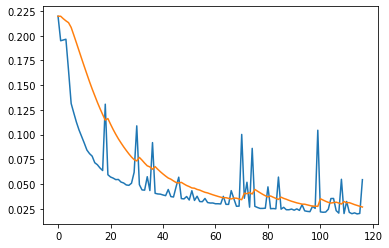

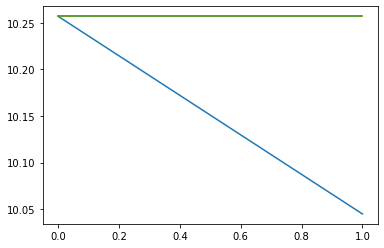

In [1]:
import sys
import matplotlib.pyplot as plt

logpaths = ["iterative_refinement/experiments/sr_ffhq_211130_015253/logs/train.log"]
# logpaths = ["iterative_refinement/experiments/sr_ffhq_211120_002035/logs/train.log",
#             "iterative_refinement/experiments/sr_ffhq_211122_204437/logs/train.log",
#             "iterative_refinement/experiments/sr_ffhq_211123_090353/logs/train.log",
#           ]
           
train_losses = []
val_losses = []
for logpath in logpaths:
    with open(logpath, 'r') as f:
        contents = f.read()
        for chunk in contents.split("l_pix: ")[1:]:
            train_losses.append(float(chunk[:10]))
        for chunk in contents.split("PSNR: ")[1:]:
            val_losses.append(float(chunk[:10]))

def mvavg(loss, scale=0.1):
    mvavg = [loss[0]]
    for i in range(len(loss)-1):
        mvavg.append(mvavg[i]+(loss[i]-mvavg[i])*scale)
    return mvavg
        
plt.plot(train_losses)
plt.plot(mvavg(train_losses))
plt.show()
plt.plot(val_losses)
plt.plot(mvavg(val_losses))
plt.plot(mvavg(val_losses, scale = 0.02))
plt.show()

